# Exploratory Data Analysis – A Case Study

![](http://machinelearningmastery.com/wp-content/uploads/2014/11/Exploratory-Data-Analysis.jpg)

### Introduction

A Data Scientist must understand the data in hand. Before diving deep into the oceans’ of [predictive analysis](http://fusionanalyticsworld.com/2016/09/predictive-analysis-business-booster-bfsi-space/), he/she have to pause and look at the enormous mass of messy data points (unstructured and structured) through the looking glass of analytic powers, domain knowledge, subjective understanding, skepticism of existing assumptions – to find solutions to business challenges. [Data Scientists](http://fusionanalyticsworld.com/2016/11/75-must-know-data-science-interview-questions/) often spend lot of time wrangling, massaging the data and building various hypothesis.

This time we will delve in one of the interesting approaches to understand the data – EDA and go through EDA of a real world data.

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) refers to a set of approaches to analyze datasets , to summarize their main characteristics, often with visual methods. It was originally developed by John Tukey to display data in such a way that interesting features will become apparent.

The seminal work in EDA is [Exploratory Data Analysis](http://fusionanalyticsworld.com/2016/12/exploratory-data-analysis-case-study/), Tukey, (1977). Over the years it has benefitted from other noteworthy publications such as Data Analysis and Regression, Mosteller and Tukey (1977), Interactive Data Analysis, Hoaglin (1977), The ABC’s of EDA, Velleman and Hoaglin (1981) . It has gained a large following as “the” way to analyze a data set. Unlike classical methods which usually begin with an assumed model for the data, EDA techniques are used to excavate the data to suggest models that might be appropriate.

Various graphical techniques are generally used in EDA. But they are often quite simple, consisting of various techniques of:

1. Simple data plots like scatter plots, data traces, bar diagrams, histograms, bihistograms, probability plots, lag plots, block plots, and Youden plots.
2. Statistical plots like mean plots, standard deviation plots, box plots, and main effects plots of the raw data. It help in understanding distribution of data.
3. We can understand the outliers, viewing distribution through various plots. Often we can compare by placing various plots relating to sample from different populations.


In this notebook, I'm going to use Python to perform the analysis.

####  Required libraries 

If you don't have Python on your computer, you can use the Anaconda Python distribution to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **pandas:** Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **matplotlib:** Basic plotting library in Python; most other Python plotting libraries are built on top of it.



## A Case Study

#### Data Source:

Let's perform some EDA on real world data. The data we will consider is Baltimore Police Department Arrest data. The data is hosted on: [Data set Source](https://data.baltimorecity.gov/Public-Safety/BPD-Arrests/3i3v-ibrt)  Baltimore Police Depratment’s website: [Baltimore Police Department](http://www.baltimorepolice.org/) .  Data consists of around 1,31,000 arrests made by the Baltimore Police Department.

This data represents the top arrest charge of those processed at Baltimore’s Central Booking & Intake Facility. This data does not contain those who have been processed through Juvenile Booking. The data set was originally created on October 18, 2011. The data set was last updated on November 18, 2016. It is updated on a monthly basis.

**Metadata: **

+ Arrest-ID
+ Age
+ Sex
+ Race
+ ArrestDate
+ ArrestTime
+ ArrestLocation
+ IncidentOffense
+ IncidentLocation
+ Charge
+ ChargeDescription
+ District
+ Post
+ Neighborhood
+ Location1(Location Coordinates)


** Let's start by importing some libraries: **

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

** First we will load the data and understand its dimension **

In [2]:
# reading the data from the csv file
data_BPD = pd.read_csv('./data/BPD_Arrests.csv')
data_BPD

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Location 1
0,17096677.0,30.0,M,B,06/24/2017,23:20,2600 HARLEM AVE,4ECOMMON ASSAULT,2600 HARLEM AVE,1 1415,COMMON ASSAULT,Western,721.0,Mosher,"(39.2956491498688, -76.6603378919813)"
1,17096696.0,37.0,M,B,06/24/2017,22:37,3400 ROYCE AVE,4ECOMMON ASSAULT,3400 ROYCE AVE,2 0254,VIOLATION OF AN EXPARTE,Northwestern,614.0,Central Park Heights,"(39.3408854099437, -76.6703938389262)"
2,17096666.0,18.0,M,B,06/24/2017,22:20,NaN,Unknown Offense,NaN,1 1415,ASSAULT-SEC DEGREE,NaN,NaN,NaN,NaN
3,17096654.0,45.0,M,B,06/24/2017,21:45,NaN,Unknown Offense,5200 REISTERSTOWN RD,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN
4,17096656.0,20.0,F,W,06/24/2017,21:30,3700 MT PLEASANT AVE,4ECOMMON ASSAULT,3700 MOUNT PLEASANT AVE,1 1415,COMMON ASSAULT,Southeastern,223.0,Baltimore Highlands,"(39.2909775809908, -76.5666437818901)"
5,17096664.0,31.0,F,B,06/24/2017,21:27,2800 N LOUDON AVE,4ECOMMON ASSAULT,2800 N LOUDON AVE,1 1415,2ND DEGRES ASSAULT,Northwestern,641.0,Windsor Hills,"(39.3168239473944, -76.6870797971229)"
6,17096679.0,26.0,M,B,06/24/2017,21:14,4000 OLD YORK RD,4ECOMMON ASSAULT,4000 OLD YORK RD,1 0043,ASSAULT BY THREAT ON POLICE,Northern,542.0,Pen Lucy,"(39.3381184586467, -76.6076076349432)"
7,17096655.0,40.0,M,B,06/24/2017,20:40,NaN,Unknown Offense,NaN,1 1420,ASSAULT-FIRST DEGREE,NaN,NaN,NaN,NaN
8,17096637.0,40.0,M,B,06/24/2017,20:10,NaN,Unknown Offense,NaN,1 0088,VIOLATION OF PROBATION,NaN,NaN,NaN,NaN
9,17096643.0,21.0,M,B,06/24/2017,20:10,5900 PLUMER AVE,Unknown Offense,SPRINGWOOD AV & EURITH AV,NaN,DIRT BIKE VIOLATION,Northeastern,445.0,Cedmont,"(39.3438569301065, -76.5316078057203)"


In [3]:
print(data_BPD.shape) # Get the shape of the data

(145654, 15)


So the data have ** 145654 **  observations and ** 15 ** variables.

Let’s have a sneak peek of data before we start our analysis:

In [4]:
data_BPD.describe(include='all') #Generates descriptive statistics

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Location 1
count,1.379670e+05,145626.000000,145654,145654,145654,145654,86360,145654,85060,127659,145152,86331,86312.000000,86330,86404
unique,NaN,NaN,2,5,1636,2314,11757,292,18041,608,12487,9,NaN,550,25324
top,NaN,NaN,M,B,08/15/2013,19:00,200 N EUTAW ST,Unknown Offense,200 N Eutaw St,1 1415,Failure To Appear || Failure To Appear,Southern,NaN,DOWNTOWN,"(39.2915696972000, -76.6210983902000)"
freq,NaN,NaN,118011,119138,186,2323,465,93452,473,21191,15373,12010,NaN,2623,399
mean,1.476867e+07,32.950620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521.294721,NaN,NaN
std,1.098782e+06,11.575005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.610076,NaN,NaN
min,1.361038e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,NaN,NaN
25%,1.377849e+07,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.000000,NaN,NaN
50%,1.416321e+07,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,515.000000,NaN,NaN
75%,1.600838e+07,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735.000000,NaN,NaN


In [5]:
# Let's see how many missing values we have in each variable
for column in data_BPD.columns:
    print(column, data_BPD[column].isnull().sum())

Arrest 7687
Age 28
Sex 0
Race 0
ArrestDate 0
ArrestTime 0
ArrestLocation 59294
IncidentOffense 0
IncidentLocation 60594
Charge 17995
ChargeDescription 502
District 59323
Post 59342
Neighborhood 59324
Location 1 59250


We have NA values and missing labels in some variables. This is quite intuitive in real world data. We have to prepare our data taking care of all hindrances.

** Lets’ understand the Age distribution: **

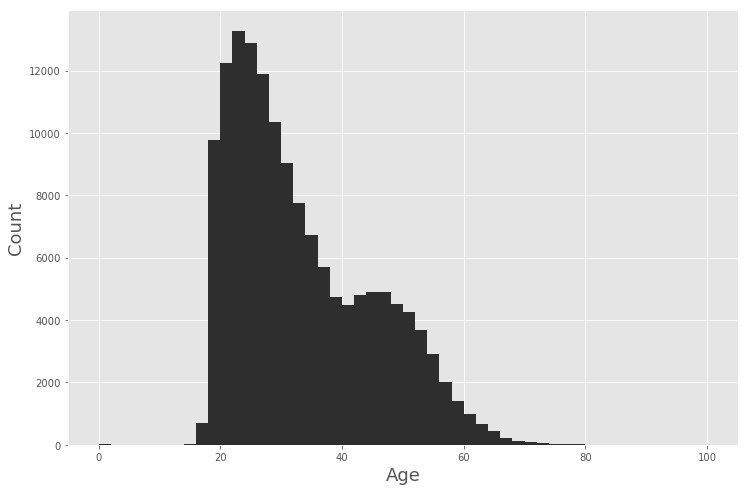

In [6]:
plt.figure(figsize = (12,8)) # set the figure size
plt.xlabel('Age', fontsize=18) # set the label of the x axis
plt.ylabel('Count', fontsize=18) # set the label of the y axis
data_BPD['Age'].hist(bins = 50, color= '#2E2E2E') # plotting

As we see most of arrests are in the age group of ** 20 -27. **

**A cursory view of gender (Sex) distribution reveals the following:**

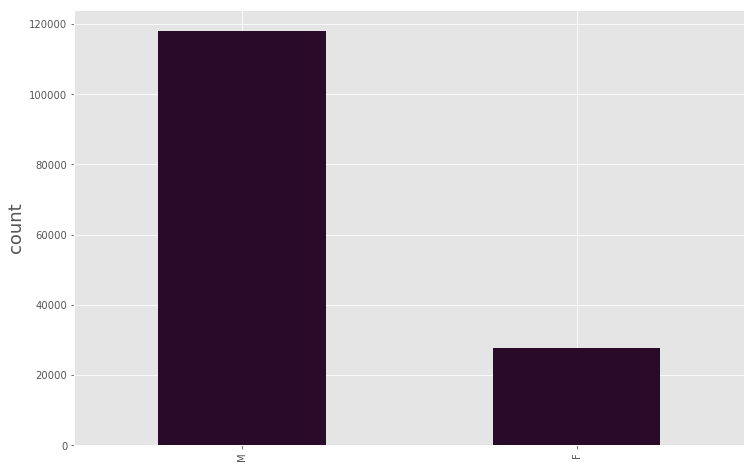

In [7]:
plt.figure(figsize = (12,8))
plt.ylabel('Sex', fontsize=18)
plt.ylabel('count', fontsize=18)

data_BPD['Sex'].value_counts().plot.bar(stacked=True, color='#2A0A29')

So the number of arrests is dominated by ** male **.

** Let's see how the race is distributed: **

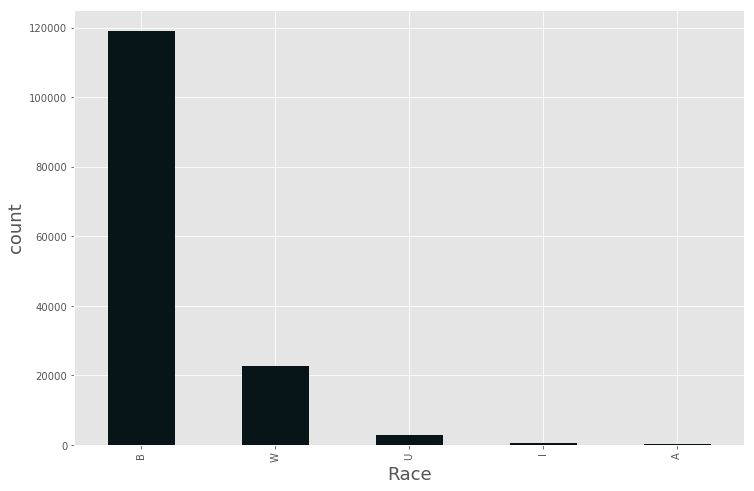

In [8]:
plt.figure(figsize = (12,8))
plt.xlabel('Race', fontsize=18)
plt.ylabel('count', fontsize=18)

data_BPD['Race'].value_counts().plot.bar(stacked=True, color='#071418')

So, we see from data people from **B** Race group are mostly arrested by police.

We have variables recording the ** Arrest Date **  and ** Arrest Time **. We can use these variables to reveal some interesting patterns.


In [9]:
#First let's convert our ArrestDate and ArrestTime columns to pandas.datetime type:
data_BPD['ArrestDate'] = pd.to_datetime(data_BPD['ArrestDate'], format='%m/%d/%Y')

# Some of the observations have hh.mm format so we adjust them to have the same format as the other observations hh:mm 
data_BPD['ArrestTime'] = data_BPD['ArrestTime'].map(lambda s: s.replace('.', ':'))
data_BPD['ArrestTime'] = pd.to_datetime(data_BPD['ArrestTime'], format='%H:%M')

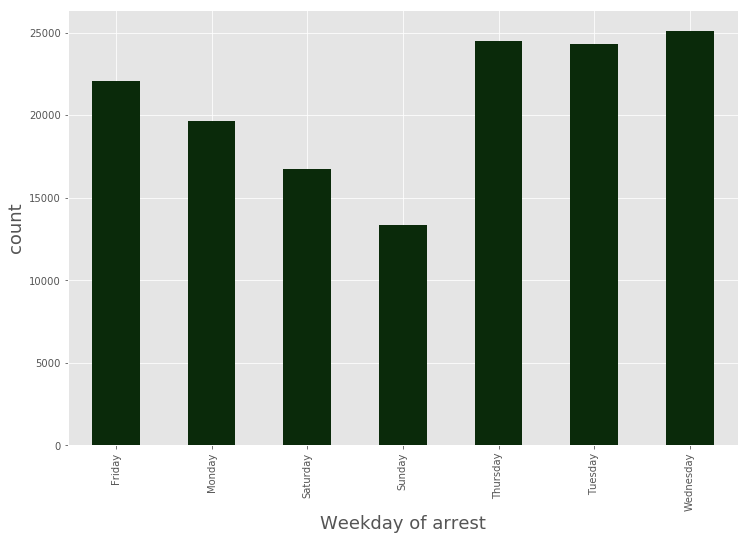

In [10]:
plt.figure(figsize = (12,8))
(data_BPD['ArrestDate']
     .groupby(data_BPD.ArrestDate.dt.weekday_name) # first we group our data by the day of the week
     .agg('count') # We then compute the number of observation we have in each group
     .plot.bar(stacked=True, color='#0A2A0A') # Plotting
)
plt.xlabel('Weekday of arrest', fontsize=18)
plt.ylabel('count', fontsize=18)

We can see that ** weekends ** have fewer number of arrests.

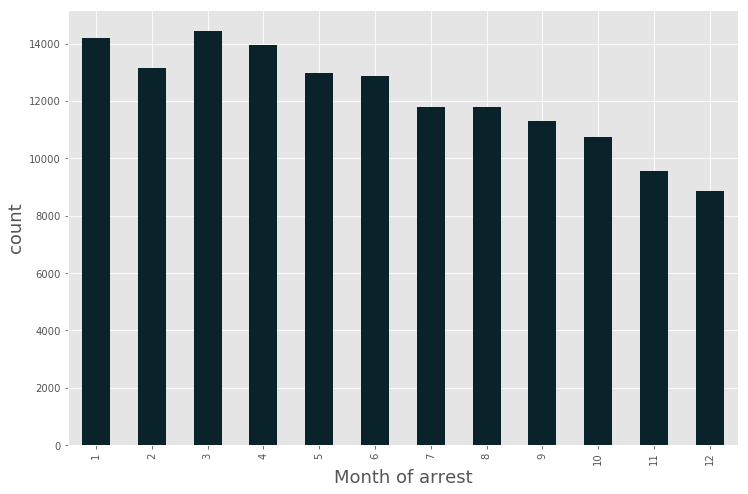

In [11]:
plt.figure(figsize = (12,8))
(data_BPD['ArrestDate']
     .groupby(data_BPD.ArrestDate.dt.month) 
     .agg('count')
     .plot.bar(stacked=True, color='#0A2229')
)
plt.xlabel('Month of arrest', fontsize=18)
plt.ylabel('count', fontsize=18)

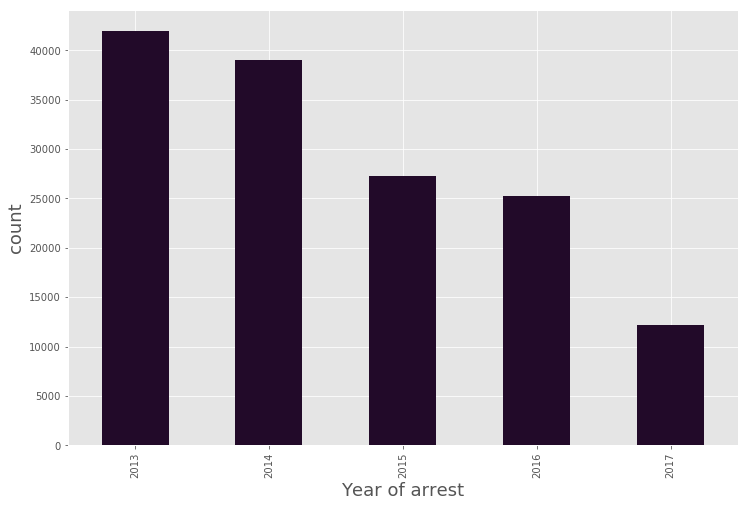

In [12]:
plt.figure(figsize = (12,8))
(data_BPD['ArrestDate']
     .groupby(data_BPD.ArrestDate.dt.year)
     .agg('count')
     .plot.bar(stacked=True, color='#220A29')
)
plt.xlabel('Year of arrest', fontsize=18)
plt.ylabel('count', fontsize=18)

Number of people arrested also show a ** declining trend** year-on-year (2013-2017).

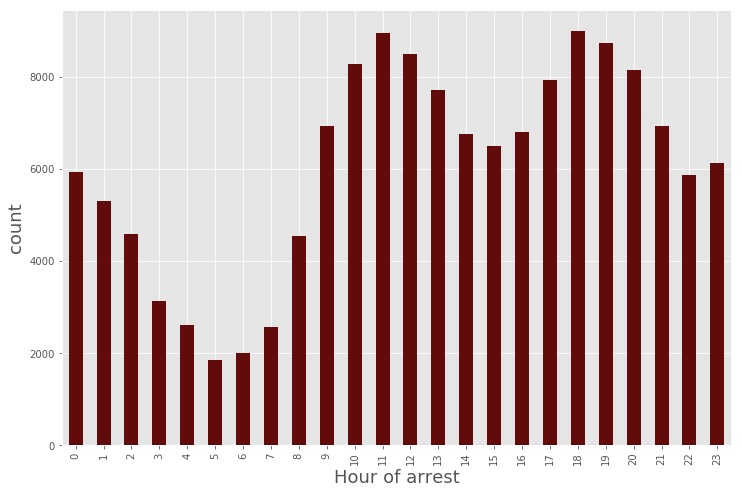

In [13]:
plt.figure(figsize = (12,8))
(data_BPD['ArrestDate']
     .groupby(data_BPD.ArrestTime.dt.hour)
     .agg('count')
     .plot.bar(stacked=True, color='#610B0B')
)
plt.xlabel('Hour of arrest', fontsize=18)
plt.ylabel('count', fontsize=18)

Now, we can see when most of the arrests occur in the ** day**. There are fewer arrests in early morning.

**Top 15 arrest locations are the following:**

In [14]:
data_BPD['ArrestLocation'].value_counts()[:15].to_frame('Number of arrests')

,Number of arrests
200 N EUTAW ST,465
1500 RUSSELL ST,365
1600 W NORTH AVE,353
400 E LEXINGTON ST,297
300 N EUTAW ST,251
400 E BALTIMORE ST,244
400 W SARATOGA ST,232
600 LAURENS ST,230
2400 FREDERICK AVE,218
5100 REISTERSTOWN RD,213


** Top 15 Incident Offense are the following:**

In [15]:
import re

# We remove symbols from IncidentOffense column and convert it to lowercase
data_BPD['IncidentOffense'] = data_BPD['IncidentOffense'].map(lambda s : re.sub('[^\w]','', s).lower())

data_BPD['IncidentOffense'].value_counts()[:15].to_frame('Number of incidents')

,Number of incidents
unknownoffense,96661
87narcotics,12391
4ecommonassault,7923
87onarcoticsoutside,2617
6clarcenyshoplifting,2444
79other,2046
4caggassltoth,1894
4baggassltcut,1633
24towedvehicle,1633
97searchseizure,1547


** Top 15 Incident Locations are the following:**

In [16]:
data_BPD['IncidentLocation'].value_counts()[:15].to_frame('Number of incidents')

,Number of incidents
200 N Eutaw St,473
400 W Lexington St,240
300 N Eutaw St,235
1500 Russell St,222
400 E Baltimore St,221
1600 W North Av,200
400 W Saratoga St,197
600 Laurens St,175
600 Cherry Hill Rd,151
1200 W Pratt St,143


** Top 15 charges: **

In [17]:
data_BPD['ChargeDescription'].value_counts()[:15].to_frame('Number of arrests')

,Number of arrests
Failure To Appear || Failure To Appear,15373
Unknown Charge,8508
Asslt-Sec Degree || Assault-Sec Degree,7769
Cds:Possess-Not Marihuana || Cds Violation,5873
Cds:Possess-Not Marihuana || Cds,3760
FAILURE TO APPEAR,3195
Violation Of Probation || Violation Of Probation,3041
Asslt-Sec Degree || Common Assault,2805
ASSAULT-SEC DEGREE,2036
Cds: Poss Marihuana L/T 10 G || Cds Violation,1633


** Lets’ view the distribution of people arrested across different districts: **

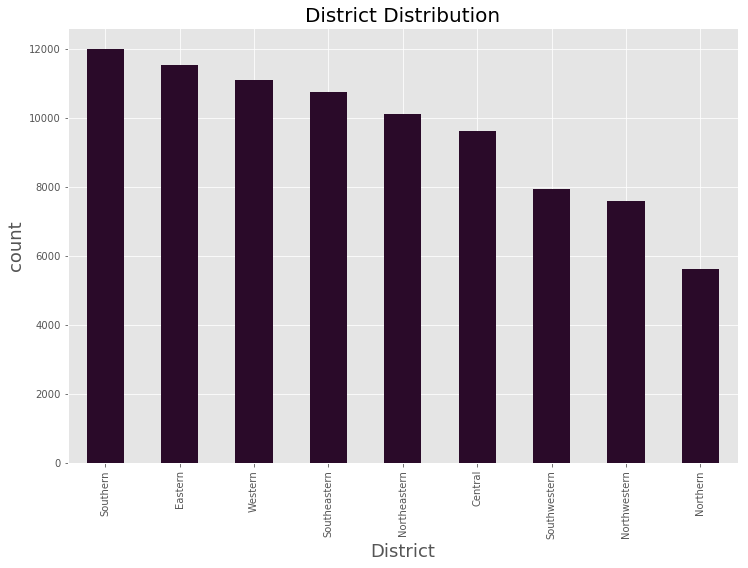

In [18]:
plt.figure(figsize = (12,8))
data_BPD['District'].value_counts().plot.bar(stacked=True, color='#2A0A29')
plt.xlabel('District', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('District Distribution', fontsize=20)

Comparatively, ** Southern district ** has more number of arrests.

#### Distribution of Arrest Year & Arrest month

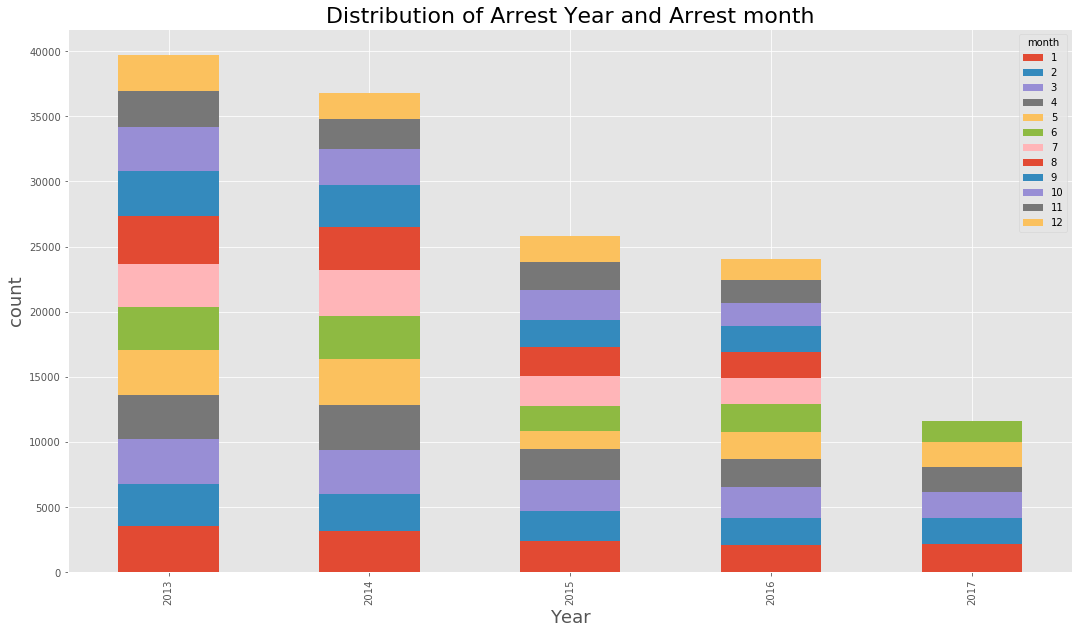

In [19]:
data_BPD['year'] = data_BPD['ArrestDate'].dt.year
data_BPD['month'] = data_BPD['ArrestDate'].dt.month
(data_BPD.pivot_table('Arrest', index='year', columns='month', aggfunc = 'count', fill_value=0)
     .plot(kind='bar',stacked=True, figsize=(18,10))
)

plt.xlabel('Year', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('Distribution of Arrest Year and Arrest month', fontsize = 22)

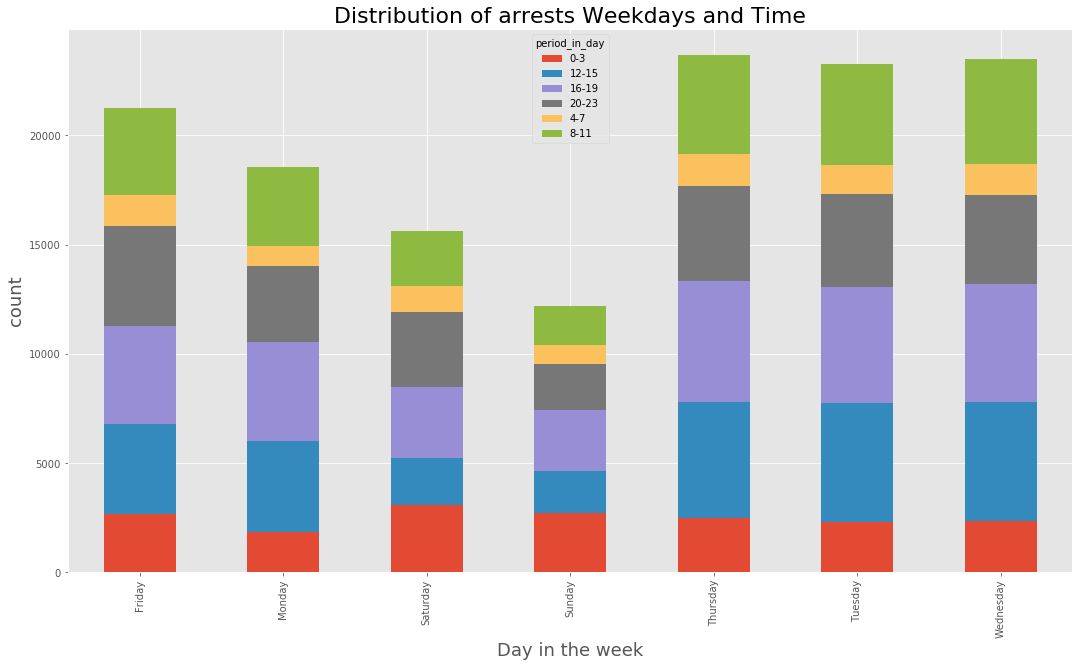

In [20]:
hour_period_map = {
    0 : '0-3',
    1 : '0-3',
    2 : '0-3',
    3 : '0-3',
    4 : '4-7',
    5 : '4-7',
    6 : '4-7',
    7 : '4-7',
    8 : '8-11',
    9 : '8-11',
    10 : '8-11',
    11 : '8-11',
    12 : '12-15',
    13 : '12-15',
    14 : '12-15',
    15 : '12-15',
    16 : '16-19',
    17 : '16-19',
    18 : '16-19',
    19 : '16-19',
    20 : '20-23',
    21 : '20-23',
    22 : '20-23',
    23 : '20-23',
}
data_BPD['period_in_day'] = data_BPD['ArrestTime'].map(lambda time : hour_period_map[time.hour])
data_BPD['weekday'] = data_BPD['ArrestDate'].dt.weekday_name
(data_BPD.pivot_table('Arrest', index='weekday', columns='period_in_day', aggfunc = 'count', fill_value=0)
     .plot(kind='bar',stacked=True, figsize=(18,10))
)

plt.xlabel('Day in the week', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('Distribution of arrests Weekdays and Time', fontsize = 22)

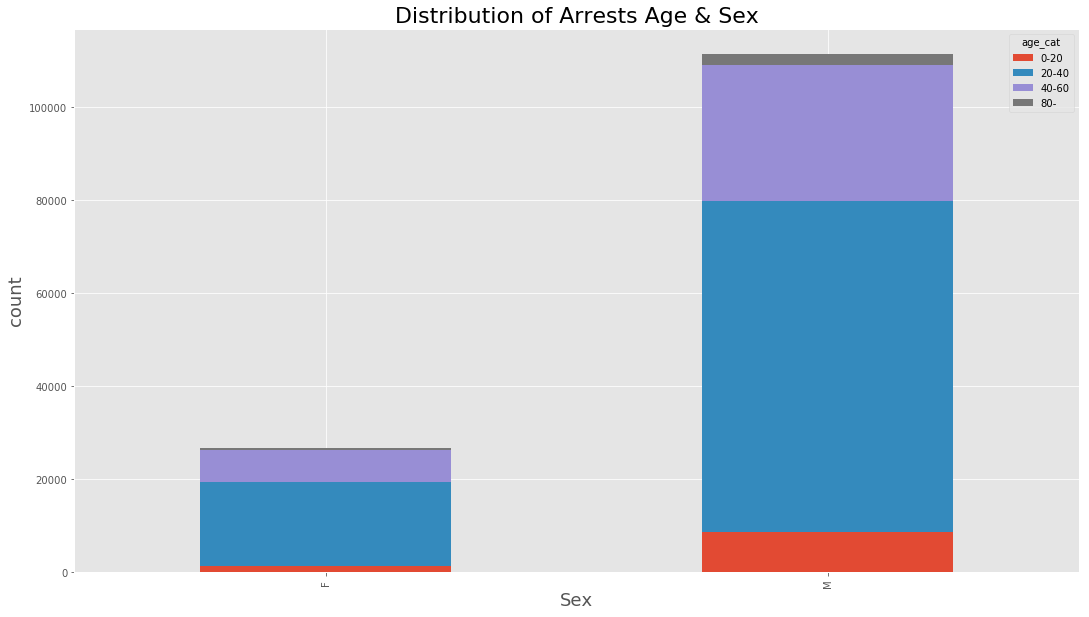

In [21]:
def age_cat_map(age):
    if age < 20 :
        return '0-20'
    elif age < 40 :
        return '20-40'
    elif age < 60 :
        return '40-60'
    elif age < 60 :
        return '60-80'
    else :
        return '80-'
    
data_BPD['age_cat'] = data_BPD['Age'].map(age_cat_map)
(data_BPD.pivot_table('Arrest', index='Sex', columns='age_cat', aggfunc = 'count', fill_value=0)
     .plot(kind='bar',stacked=True, figsize=(18,10))
)
plt.title('Distribution of Arrests Age & Sex', fontsize = 22)
plt.xlabel('Sex', fontsize=18)
plt.ylabel('count', fontsize=18)    

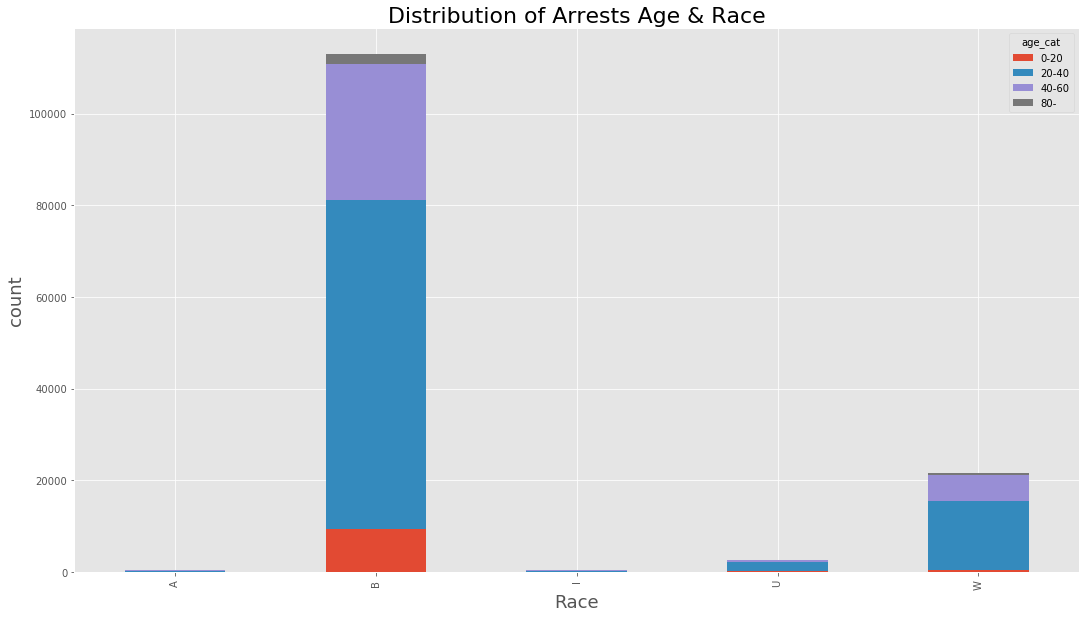

In [22]:
(data_BPD.pivot_table('Arrest', index='Race', columns='age_cat', aggfunc = 'count', fill_value=0)
     .plot(kind='bar',stacked=True, figsize=(18,10))
)

plt.xlabel('Race', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('Distribution of Arrests Age & Race', fontsize = 22)


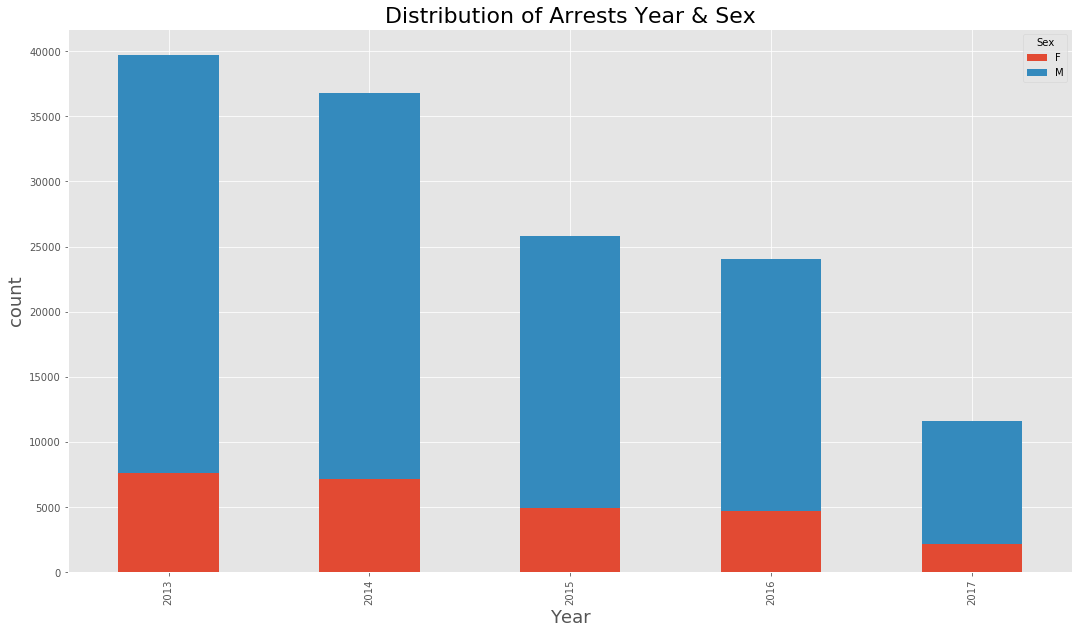

In [23]:
(data_BPD.pivot_table('Arrest', index='year', columns='Sex', aggfunc = 'count', fill_value=0)
     .plot(kind='bar',stacked=True, figsize=(18,10))
)
plt.title('Distribution of Arrests Year & Sex', fontsize = 22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('count', fontsize=18) 

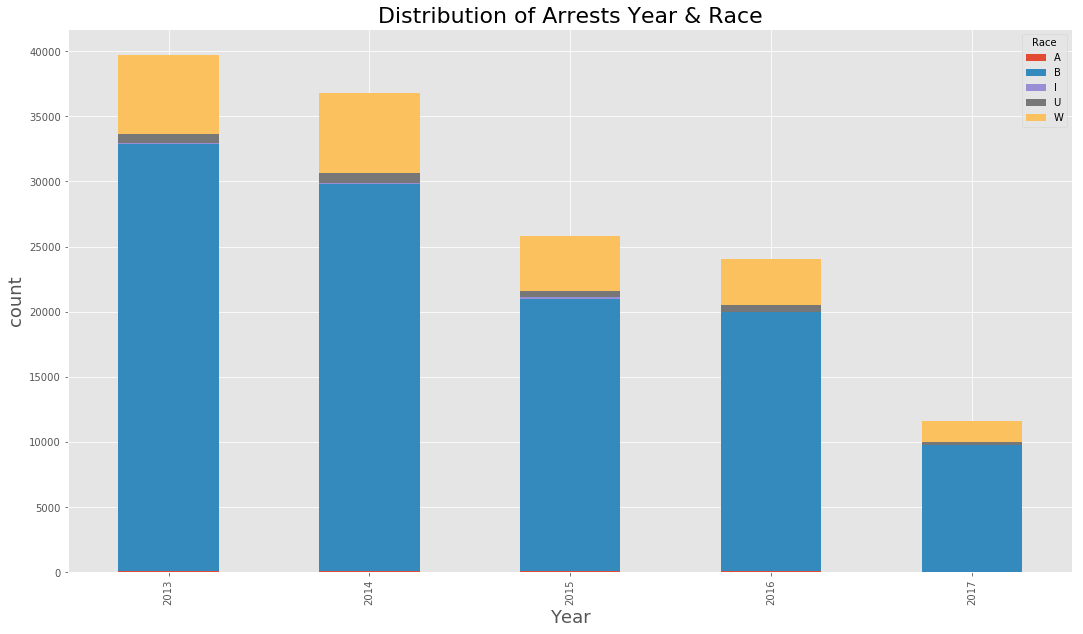

In [24]:
(data_BPD.pivot_table('Arrest', index='year', columns='Race', aggfunc = 'count', fill_value=0)
     .plot(kind='bar',stacked=True, figsize=(18,10))
)
plt.title('Distribution of Arrests Year & Race', fontsize = 22)

plt.xlabel('Year', fontsize=18)
plt.ylabel('count', fontsize=18) 

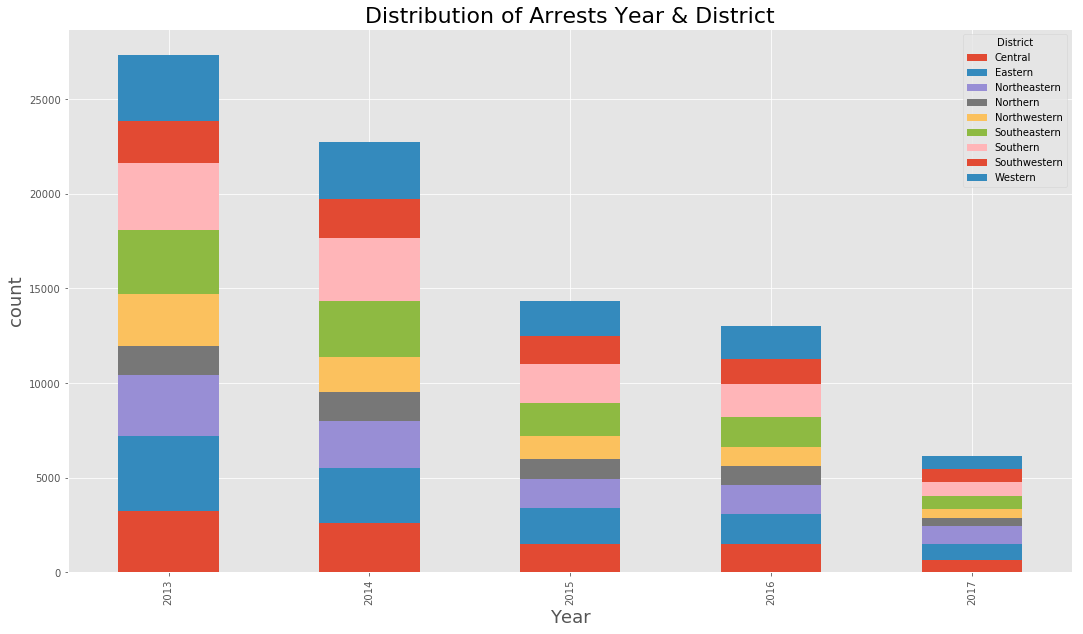

In [25]:
(data_BPD.pivot_table('Arrest', index='year', columns='District', aggfunc = 'count', fill_value=0)
     .plot(kind='bar',stacked=True, figsize=(18,10))
)
plt.title('Distribution of Arrests Year & District', fontsize = 22)

plt.xlabel('Year', fontsize=18)
plt.ylabel('count', fontsize=18) 

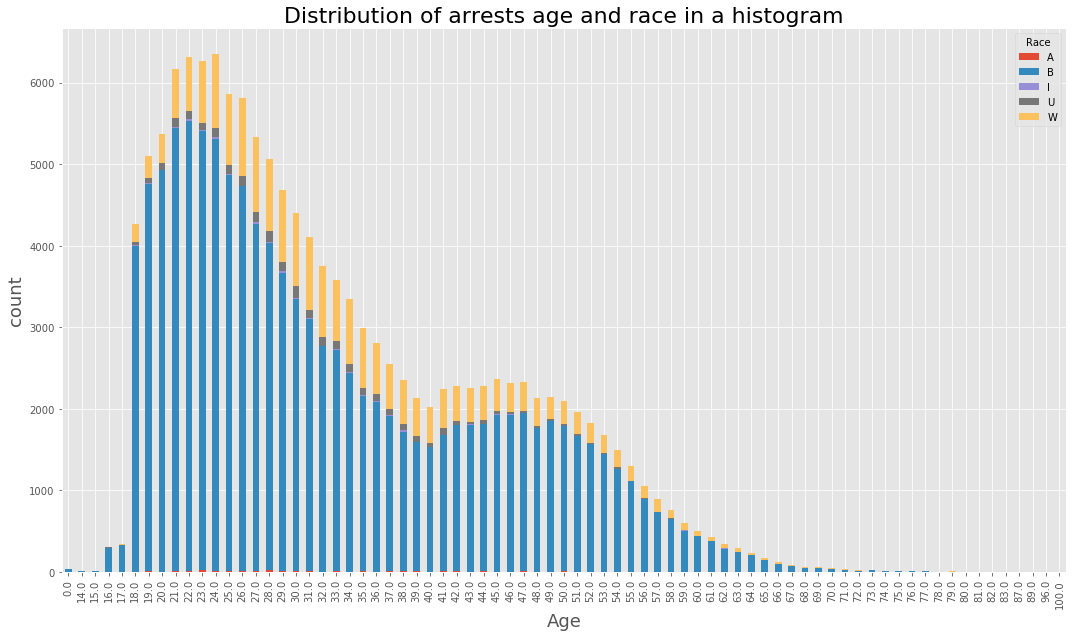

In [26]:
(data_BPD.pivot_table('Arrest', index='Age', columns='Race', aggfunc = 'count', fill_value=0)
     .plot(kind='bar', stacked = True, figsize=(18,10))
)
plt.title('Distribution of arrests age and race in a histogram', fontsize = 22)

plt.xlabel('Age', fontsize=18)
plt.ylabel('count', fontsize=18) 

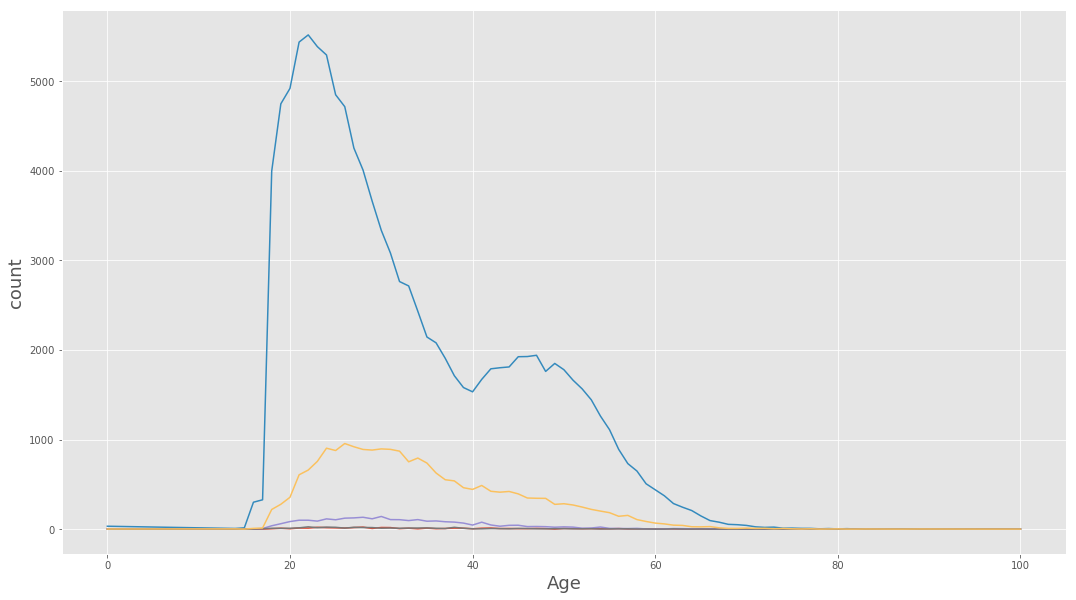

In [27]:
df = data_BPD.pivot_table('Arrest', index='Age', columns='Race', aggfunc = 'count', fill_value=0)
plt.figure(figsize=(18,10))
plt.plot(df['A'])
plt.plot(df['B'])
plt.plot(df['U'])
plt.plot(df['I'])
plt.plot(df['W'])

plt.xlabel('Age', fontsize=18)
plt.ylabel('count', fontsize=18) 

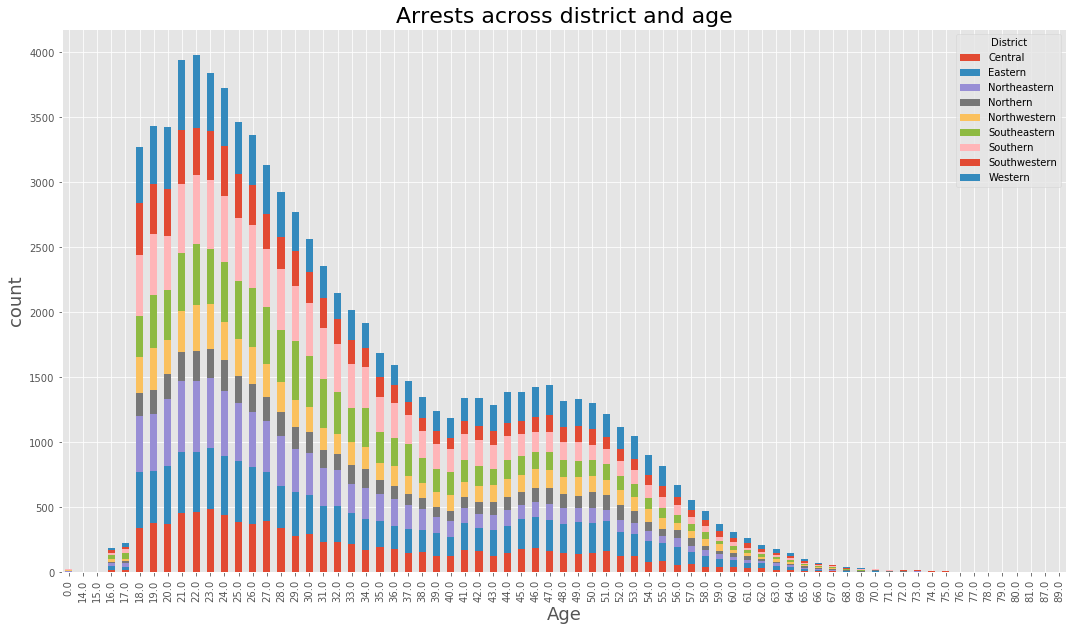

In [28]:
(data_BPD.pivot_table('Arrest', index='Age', columns='District', aggfunc = 'count', fill_value=0)
     .plot(kind='bar', stacked = True, figsize=(18,10))
)

plt.xlabel('Age', fontsize=18)
plt.ylabel('count', fontsize=18) 
plt.title('Arrests across district and age', fontsize = 22)


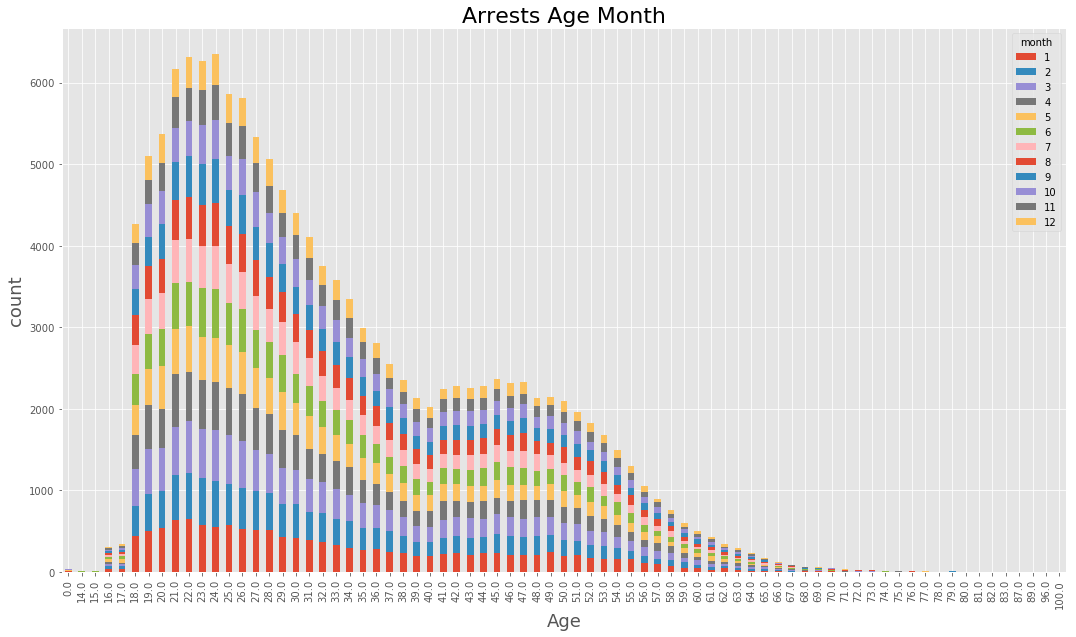

In [29]:
(data_BPD.pivot_table('Arrest', index='Age', columns='month', aggfunc = 'count', fill_value=0)
     .plot(kind='bar', stacked = True, figsize=(18,10))
)

plt.xlabel('Age', fontsize=18)
plt.ylabel('count', fontsize=18) 
plt.title('Arrests Age Month', fontsize = 22)


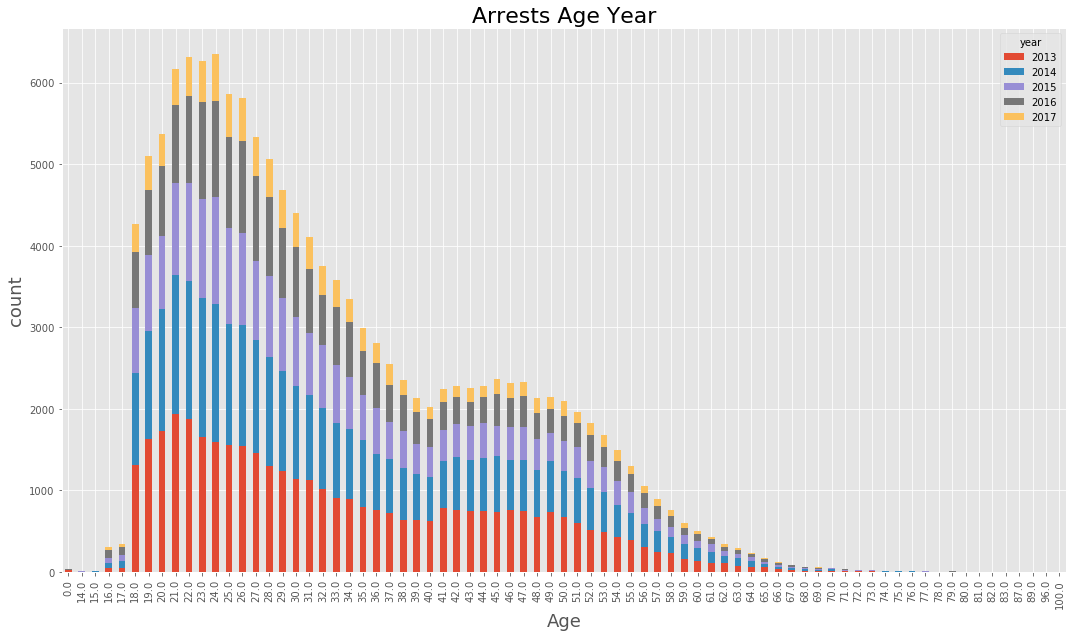

In [30]:
(data_BPD.pivot_table('Arrest', index='Age', columns='year', aggfunc = 'count', fill_value=0)
     .plot(kind='bar', stacked = True, figsize=(18,10))
)

plt.xlabel('Age', fontsize=18)
plt.ylabel('count', fontsize=18) 
plt.title('Arrests Age Year', fontsize = 22)


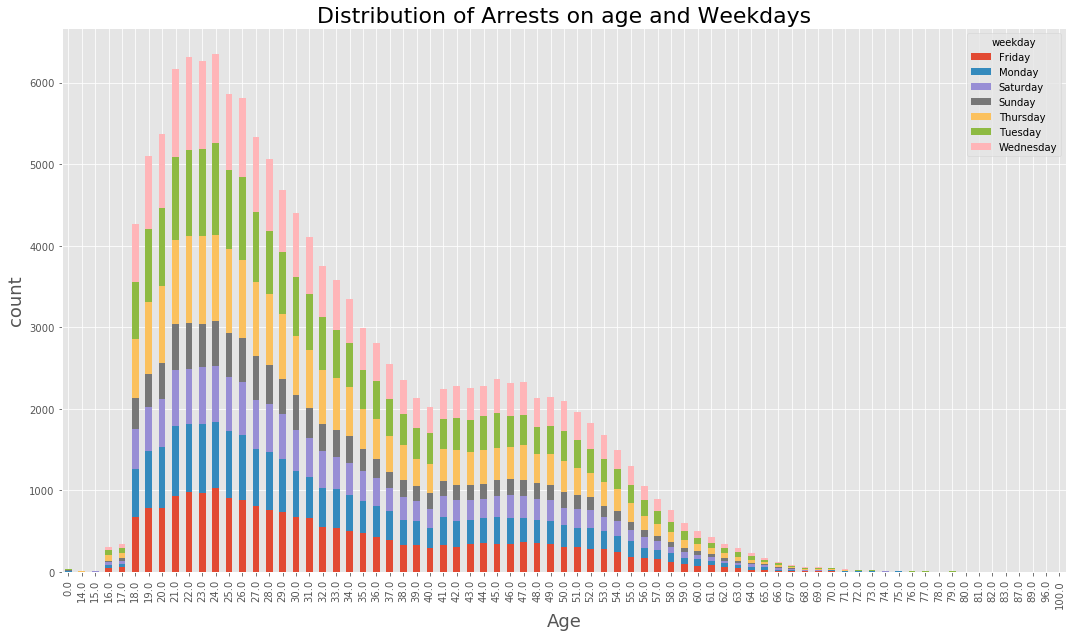

In [31]:
(data_BPD.pivot_table('Arrest', index='Age', columns='weekday', aggfunc = 'count', fill_value=0)
     .plot(kind='bar', stacked = True, figsize=(18,10))
)

plt.xlabel('Age', fontsize=18)
plt.ylabel('count', fontsize=18) 
plt.title('Distribution of Arrests on age and Weekdays', fontsize = 22)


We have seen the distributions of number of arrests across various variables and the interactions among them.

### End Notes:

We can appreciate the role of exploratory data analysis in understanding the patterns of data and preparation of hypothesis. These serve as building blocks for further analysis. We have seen various plots to understand the data.  For better understanding we have analyzed a real world data set. Stakeholders may take few of the decisions on prevention of crime and deployment of personnel after having a glance on the plots.  A resourceful analysis can help taking complex decisions. We can use Predictive analytics and various optimization techniques for taking such decisions.